In [2]:
import numpy as np
from sklearn.datasets import load_files
reviews_train = load_files("C:\\Users\Asus\PycharmProjects\\bigDataLabs\seventh_lab\\aclImdb\\test")

text_train, y_train = reviews_train.data, reviews_train.target

In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [4]:
reviews_test = load_files("aclImdb/test")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 10000, max_df = .15)
X = vect.fit_transform(text_train)

In [7]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter = 10, random_state=0)
document_topics = lda.fit_transform(X)

In [8]:
lda.components_.shape

(10, 10000)

In [9]:
sorting = np.argsort(lda.components_, axis = 1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

In [10]:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5,n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
us            horror        role          war           action        
world         worst         performance   american      role          
family        nothing       women         book          cast          
own           didn          girl          world         murder        
each          actually      cast          us            director      
real          re            actress       our           performance   
young         minutes       played        years         robert        
mother        going         plays         soldiers      hitchcock     
woman         guy           young         history       plays         
between       actors        play          german        young         


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
car 

In [13]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10,random_state=0)
document_topics100 = lda100.fit_transform(X)

In [14]:
import numpy as np
topics = np.array([7, 16, 24, 25, 25, 28, 36, 37, 45,51, 53, 54, 63,89,97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7,n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 25      topic 28      topic 36      
--------      --------      --------      --------      --------      --------      --------      
series        noir          darkness      london        london        game          years         
robin         robert        rose          vegas         vegas         jason         wonderful     
tv            young         massacre      tv            tv            play          old           
show          murder        heart         disaster      disaster      played        disney        
doctor        spanish       conrad        water         water         lloyd         music         
comedy        joe           gulliver      mr            mr            oscar         saw           
funny         novel         marlow        hamilton      hamilton      hoffman       again         
murphy        anti          interesting   las           las           matthau       loved         
hood      

In [15]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2])+b".\n")

b"I've been intending to write a review of this film for some time, but only now have I actually managed to get my thoughts down for the perusal of others.  I never had the pleasure of seeing this film on the `big screen' which is a shame, as it is often visually stunning, but I have revisited it on video numerous times over the years, enjoying it immensely every time.\n"
b'The Hospital is a movie that was made ahead of its time. This film, produced by screenwriter Paddy Chayefsky, who gave us the Oscar-Winning film, "Network", deals with overworked staff, gross incompetence, and bureaucratic corruption at a large conglomerate hospital in Manhattan.\n'
b'Francis Ford Coppola\'s "Apocalypse Now" is not a Vietnam War film. Do not confuse it with one.\n'
b'The scriptwriters, directors, and actors have lost sight of the cornerstone of a good story - the concept of suspension of disbelief. In Volcano, the concept goes up in smoke almost as quickly as the city.\n'
b'Turkish culture is comple

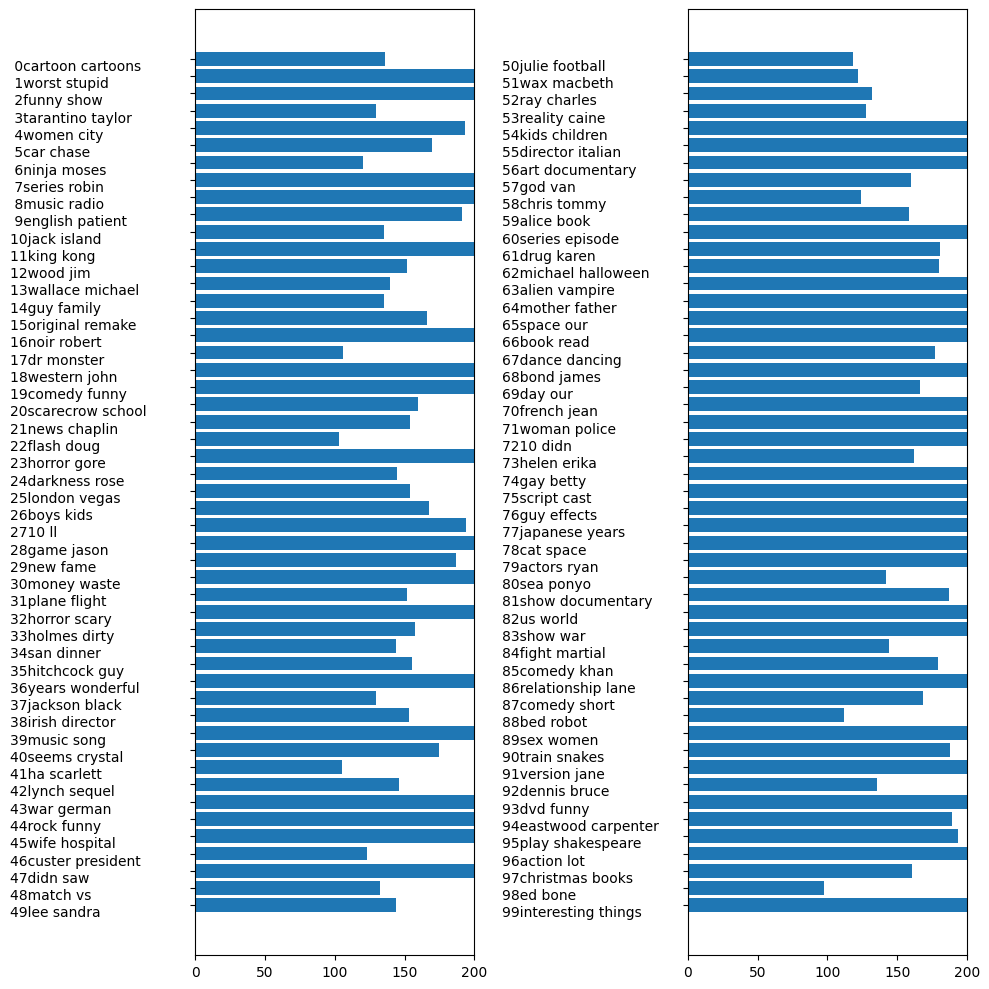

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(10, 10))  # Use plt.subplots() instead of plt.subplot()

topic_names = ["{:>2}".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 200)
    ax[col].tick_params(axis='y', pad=130)  # Correct the tick_params function

plt.tight_layout()
plt.show()
